In [2]:
import plotly.express as px
fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
print(fig)
fig.show()

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([1, 3, 2]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'sample figure'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


### **Error Bars with Plotly Express**

In [3]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
df["e"] = df["sepal_width"]/100

In [5]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                    error_x="e", error_y="e", )
fig.show()

### Asymmetric Error Bars with Plotly Express

In [6]:
import plotly.express as px
df = px.data.iris()
df["e_plus"] = df["sepal_width"]/100
df["e_minus"] = df["sepal_width"]/40
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 error_y="e_plus", error_y_minus="e_minus")
fig.show()

### **Totorial**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
import chart_studio.plotly as py
import sys
import cufflinks as cf
# Use Plotly locally
cf.go_offline()

ModuleNotFoundError: No module named 'chart_studio'

<AxesSubplot:>

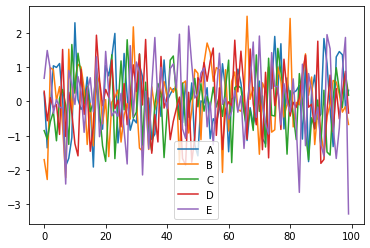

In [9]:
# Create a dataframe using a NumPy array that is 50 by 4
arr_1 = np.random.randn(100, 5)
df = pd.DataFrame(arr_1, columns=['A','B','C','D','E'])
df.head()

# Compare old plots to a Plotly interactive plot
# You can save as PNG, Zoom, Pan, Turn off & on Data and more
df.plot()

### Line Plots

In [10]:
import plotly.graph_objects as go
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [11]:
fig_1 = px.line(df_stocks, x="date", y="GOOG", labels={'x':'Date', 'y':'Price'})
fig_1.show()
# Make multiple line plots
fig_2 = px.line(df_stocks, x='date', y=['GOOG','AAPL'], labels={'x':'Date', 'y':'Price'},
       title='Apple and Google')
fig_2.show()
# Create a figure to which I'll add plots
fig = go.Figure()
# You can pull individual columns of data from the dataset and use markers or not
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, 
                        mode='lines+markers', name='Amazon'))
# You can create custom lines (Dashes : dash, dot, dashdot)
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode='lines+markers', name='Google',
                        line=dict(color='blue', width=2, dash='dashdot')))
# Further style the figure
fig.update_layout(title='Stock Price Data 2018 - 2020',xaxis_title='Price', yaxis_title='Date')

fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

### Bar Charts

In [15]:
# Get population change in US by querying for US data
df_us = px.data.gapminder().query("country == 'United States'")
print(df_us.columns)
px.bar(df_us, x='year', y='pop')

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')


In [18]:
df_tips = px.data.tips()
print(df_tips.columns)
#px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day',
 #       labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})
# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker', barmode='group')

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [25]:
# Display pop data for countries in Europe in 2007 greater than 2000000
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.show()
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)